# Python for Data Analysis

In [117]:
# %pprint
# %precision %0.3f
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi = False

In [118]:
# Display full output of cell not just last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [119]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [120]:
import numpy as np
np.set_printoptions(edgeitems=10, linewidth=120) # set numpy output width
np.set_printoptions(precision=3)
#np.set_printoptions(edgeitems=10, linewidth=180) # set numpy output width
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}) # formatter is always reset with a call to set_printoptions so must be last to stand

In [121]:
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.float_format = "{:.3f}".format
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# 14. Data Analysis Examples

## 14.1 1.USA.gov Data from Bitly

In [123]:
path = 'datasets/bitly_usagov/example.txt'
f = open(path)
print(f.readline())
f.close()

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [124]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]
records[0]
len(records)

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

3560

In [125]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [126]:
# Get top 10 listed time zones using Counter object
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [127]:
def get_count(sequence):
    count_dict = {}
    for x in sequence:
        if x in count_dict:
            count_dict[x] += 1
        else:
            count_dict[x] = 1
    # tranform the dictionary to a sorted list of tuples
    sorted_list  = sorted(count_dict.items(), key=lambda item: item[1], reverse=True)
    # re-create and return as sorted dictionary
    return {k: v for k, v in sorted_list}

In [128]:
counts = get_count(time_zones)

In [129]:
frame = pd.DataFrame(records)
frame
print(frame._is_copy)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.000,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247.000,1331822918.000,Danvers,"[42.576698, -70.954903]",nan,NaN
1,GoogleMaps/RochesterNY,US,0.000,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331923249.000,1308262393.000,Provo,"[40.218102, -111.613297]",nan,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.000,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250.000,1331919941.000,Washington,"[38.9007, -77.043098]",nan,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.000,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1331923249.000,1331923068.000,Braz,"[-23.549999, -46.616699]",nan,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.000,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923251.000,1273672411.000,Shrewsbury,"[42.286499, -71.714699]",nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.000,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1331926841.000,1301298479.000,Paramus,"[40.9445, -74.07]",nan,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.000,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1331926844.000,1307530247.000,Oklahoma City,"[35.4715, -97.518997]",nan,NaN
3557,GoogleMaps/RochesterNY,US,0.000,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331926846.000,1308262393.000,Provo,"[40.218102, -111.613297]",nan,NaN
3558,GoogleProducer,US,0.000,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1331926847.000,1327528527.000,Mountain View,"[37.419201, -122.057404]",nan,NaN


None


In [130]:
tz_counts = frame['tz'].value_counts()
tz_counts
type(tz_counts)

America/New_York         1251
                          521
America/Chicago           400
America/Los_Angeles       382
America/Denver            191
                         ... 
America/St_Kitts            1
America/Caracas             1
America/Santo_Domingo       1
Asia/Manila                 1
Asia/Pontianak              1
Name: tz, Length: 97, dtype: int64

pandas.core.series.Series

In [131]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

In [132]:
tz_counts = clean_tz.value_counts()
tz_counts

America/New_York             1251
Unknown                       521
America/Chicago               400
America/Los_Angeles           382
America/Denver                191
                             ... 
America/Argentina/Mendoza       1
Europe/Ljubljana                1
America/Mazatlan                1
Asia/Kuching                    1
America/Lima                    1
Name: tz, Length: 98, dtype: int64

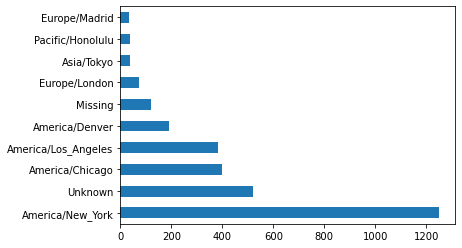

In [133]:
tz_counts[:10].plot(kind='barh')

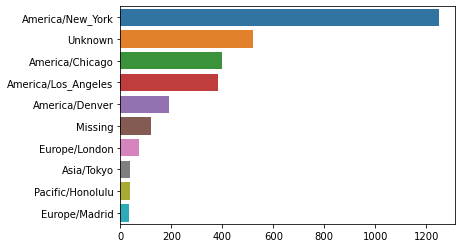

In [134]:
sns.barplot(tz_counts[:10].values, tz_counts[:10].index)

In [135]:
tz_counts
type(tz_counts)

America/New_York             1251
Unknown                       521
America/Chicago               400
America/Los_Angeles           382
America/Denver                191
                             ... 
America/Argentina/Mendoza       1
Europe/Ljubljana                1
America/Mazatlan                1
Asia/Kuching                    1
America/Lima                    1
Name: tz, Length: 98, dtype: int64

pandas.core.series.Series

In [136]:
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.000,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247.000,1331822918.000,Danvers,"[42.576698, -70.954903]",nan,NaN
1,GoogleMaps/RochesterNY,US,0.000,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331923249.000,1308262393.000,Provo,"[40.218102, -111.613297]",nan,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.000,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250.000,1331919941.000,Washington,"[38.9007, -77.043098]",nan,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.000,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1331923249.000,1331923068.000,Braz,"[-23.549999, -46.616699]",nan,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.000,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1331923251.000,1273672411.000,Shrewsbury,"[42.286499, -71.714699]",nan,NaN


In [137]:
results = pd.Series(agent.split()[0] for agent in frame['a'].dropna())
results

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [138]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

In [139]:
cframe = frame[frame.a.notnull()] # returns a copy of the matching rows from the original dataframe
cframe._is_copy = None # decouple the dataframe from its origin to avoid copy warning
cframe.loc[:, 'os'] = np.where(cframe.a.str.contains('Windows'), 'Windows', 'Not Windows')
cframe['tz'].fillna('Missing', inplace = True)
cframe['tz'].replace('', 'Unknown', inplace=True)

In [140]:
cframe._is_view # is cframe a view (reference) to another frame??

False

In [141]:
print(cframe._is_copy)

None


In [142]:
cframe[['tz', 'os']][:10]

,tz,os
0,America/New_York,Windows
1,America/Denver,Not Windows
2,America/New_York,Windows
3,America/Sao_Paulo,Not Windows
4,America/New_York,Windows
5,America/New_York,Windows
6,Europe/Warsaw,Windows
7,Unknown,Windows
8,Unknown,Not Windows
9,Unknown,Windows


In [143]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [144]:
by_tz_os.count()

a   c   nk  gr    g    h    l   al   hh    r    u    t   hc  \
tz                  os                                                                           
Africa/Cairo        Windows        3   3    3   3    3    3    3    3    3    3    3    3    3   
Africa/Casablanca   Windows        1   1    1   1    1    1    1    1    1    1    1    1    1   
Africa/Ceuta        Windows        2   2    2   2    2    2    2    2    2    2    2    2    2   
Africa/Johannesburg Windows        1   1    1   1    1    1    1    1    1    1    1    1    1   
Africa/Lusaka       Windows        1   1    1   1    1    1    1    1    1    1    1    1    1   
...                              ...  ..  ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Pacific/Auckland    Not Windows    3   3    3   3    3    3    3    3    3    3    3    3    3   
                    Windows        8   8    8   8    8    8    8    1    8    8    8    8    8   
Pacific/Honolulu    Windows       36  36   36  36   36   36   36   36   36   36   36   36   36   
Unknown             Not Windows  245   0  245   0  245  245  245  239  245  245  245  245  245   
                    Windows      276   0  276   0  276  276  276  268  276  276  276  276  276   

                                 cy  ll  _heartbeat_  kw  
tz                  os                                    
Africa/Cairo        Windows       3   3            0   0  
Africa/Casablanca   Windows       1   1            0   0  
Africa/Ceuta        Windows       2   2            0   0  
Africa/Johannesburg Windows       1   1            0   0  
Africa/Lusaka       Windows       1   1            0   0  
...                              ..  ..          ...  ..  
Pacific/Auckland    Not Windows   3   3            0   0  
                    Windows       8   8            0   0  
Pacific/Honolulu    Windows      36  36            0  32  
Unknown             Not Windows   0   0            0   4  
                    Windows       0   0            0   7  

[149 rows x 17 columns]

In [145]:
by_tz_os.size()
type(by_tz_os.size())
by_tz_os.size().index

tz                   os         
Africa/Cairo         Windows          3
Africa/Casablanca    Windows          1
Africa/Ceuta         Windows          2
Africa/Johannesburg  Windows          1
Africa/Lusaka        Windows          1
                                   ... 
Pacific/Auckland     Not Windows      3
                     Windows          8
Pacific/Honolulu     Windows         36
Unknown              Not Windows    245
                     Windows        276
Length: 149, dtype: int64

pandas.core.series.Series

MultiIndex([(                  'Africa/Cairo',     'Windows'),
            (             'Africa/Casablanca',     'Windows'),
            (                  'Africa/Ceuta',     'Windows'),
            (           'Africa/Johannesburg',     'Windows'),
            (                 'Africa/Lusaka',     'Windows'),
            (             'America/Anchorage', 'Not Windows'),
            (             'America/Anchorage',     'Windows'),
            ('America/Argentina/Buenos_Aires', 'Not Windows'),
            (     'America/Argentina/Cordoba',     'Windows'),
            (     'America/Argentina/Mendoza',     'Windows'),
            ...
            (                'Europe/Vilnius',     'Windows'),
            (              'Europe/Volgograd',     'Windows'),
            (                 'Europe/Warsaw', 'Not Windows'),
            (                 'Europe/Warsaw',     'Windows'),
            (                 'Europe/Zurich', 'Not Windows'),
            (              'Pacific/Auc

In [146]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts
type(agg_counts)

os,Not Windows,Windows
tz,,
Africa/Cairo,0.000,3.000
Africa/Casablanca,0.000,1.000
Africa/Ceuta,0.000,2.000
Africa/Johannesburg,0.000,1.000
Africa/Lusaka,0.000,1.000
...,...,...
Europe/Warsaw,1.000,15.000
Europe/Zurich,4.000,0.000
Pacific/Auckland,3.000,8.000


pandas.core.frame.DataFrame

In [147]:
indexer = agg_counts.sum(1).argsort()
type(indexer)
indexer # an indexer[0] value tells you the index of the item in the original agg_counts that will be the top in a sorted agg_counts

pandas.core.series.Series

tz
Africa/Cairo           75
Africa/Casablanca      36
Africa/Ceuta           35
Africa/Johannesburg    54
Africa/Lusaka          33
                       ..
Europe/Warsaw          14
Europe/Zurich          21
Pacific/Auckland       11
Pacific/Honolulu       96
Unknown                28
Length: 97, dtype: int64

In [148]:
count_subset = agg_counts.take(indexer[-10:])
count_subset
type(count_subset)

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.000,20.000
Europe/Madrid,16.000,19.000
Pacific/Honolulu,0.000,36.000
Asia/Tokyo,2.000,35.000
Europe/London,43.000,31.000
America/Denver,132.000,59.000
America/Los_Angeles,130.000,252.000
America/Chicago,115.000,285.000
Unknown,245.000,276.000


pandas.core.frame.DataFrame

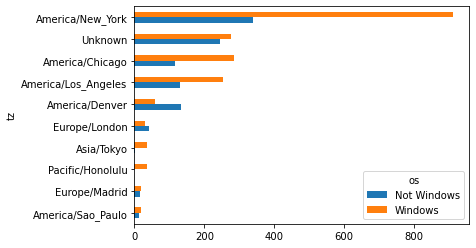

In [149]:
count_subset.plot(kind='barh')

In [150]:
count_subset = count_subset.stack()
count_subset.name = 'total' # name of the series becomes the name of the column after tranforming to a dataframe
count_subset = count_subset.reset_index() # transforming to a dataframe
count_subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.000
1,America/Sao_Paulo,Windows,20.000
2,Europe/Madrid,Not Windows,16.000
3,Europe/Madrid,Windows,19.000
4,Pacific/Honolulu,Not Windows,0.000
5,Pacific/Honolulu,Windows,36.000
6,Asia/Tokyo,Not Windows,2.000
7,Asia/Tokyo,Windows,35.000
8,Europe/London,Not Windows,43.000
9,Europe/London,Windows,31.000


In [151]:
count_subset_tranformed = count_subset.groupby('tz').transform(lambda x: x / x.sum())
count_subset_tranformed.columns = ['norm_total']

In [152]:
count_subset = pd.concat([count_subset, count_subset_tranformed], axis=1)
count_subset

,tz,os,total,norm_total
0,America/Sao_Paulo,Not Windows,13.000,0.394
1,America/Sao_Paulo,Windows,20.000,0.606
2,Europe/Madrid,Not Windows,16.000,0.457
3,Europe/Madrid,Windows,19.000,0.543
4,Pacific/Honolulu,Not Windows,0.000,0.000
5,Pacific/Honolulu,Windows,36.000,1.000
6,Asia/Tokyo,Not Windows,2.000,0.054
7,Asia/Tokyo,Windows,35.000,0.946
8,Europe/London,Not Windows,43.000,0.581
9,Europe/London,Windows,31.000,0.419


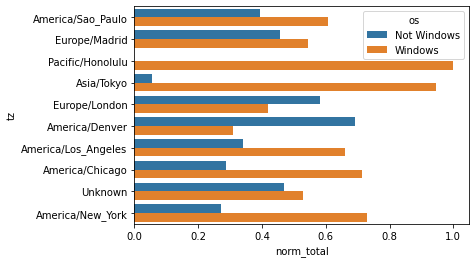

In [153]:
sns.barplot(x='norm_total', y='tz', hue='os', data=count_subset)